# Cinema: a patriarchal industry? 

**Authors**
- Marjorie Cayatte
- Maxime Leriche
- Madeleine Robert
- Arthur Tabary

**Date**\
December 23rd, 2022

> We first import the library we used for our project. 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline
import seaborn as sns
import math
from scipy import stats
import json
from datetime import datetime, date, time

# To get data on countries 
import requests

# For plotting graph
import plotly.express as px
import plotly.graph_objects as go

## 1 - Import the movies and characters dataset

We import the following datasets from the **CMU Movie Summary Corpus** as DataFrame: 
- *movie.metadata.tsv.gz*: metadata for 81,741 movies, extracted from the November 4<sup>th</sup>, 2012 dump of Freebase as **movies**. 
- *character.metadata.tsv.gz*: metadata for 450,669 characters aligned to the movies, extracted from the November 4<sup>th</sup>, 2012 dump of Freebase as **characters**. 

In [ ]:
# Import movie.metadata and format column names
movies = pd.read_csv('Data/MovieSummaries/movie.metadata.tsv',sep='\t',header=None)
movies.columns=['wiki_movie_ID','freebase_movie_ID','movie_name','movie_release_date','movie_box_off_rev','movie_runtime','movie_languages','movie_countries','movie_genres']
movies.head()

- We will clean the DataFrame *movies* by splitting the columns with multiple data into multiple columns. For example, the column "movie_countries" contains the Freebase ID and the country. To do so, we tranform dictionnary in list which will be easier to manipulate. 

In [ ]:
# Separate dictionaries into 2 columns with Freebase id and value
movies["movie_countries_id"] = movies["movie_countries"].map(eval).apply(lambda x: list(x.keys()))
movies["movie_countries"] = movies["movie_countries"].map(eval).apply(lambda x: list(x.values()))
movies["movie_genres_id"] = movies["movie_genres"].map(eval).apply(lambda x: list(x.keys()))
movies["movie_genres"] = movies["movie_genres"].map(eval).apply(lambda x: list(x.values()))
movies["movie_languages_id"] = movies["movie_languages"].map(eval).apply(lambda x: list(x.keys()))
movies["movie_languages"] = movies["movie_languages"].map(eval).apply(lambda x: list(x.values()))
movies.head()

In [ ]:
# Load character metadata and format column names
characters = pd.read_csv('Data/MovieSummaries/character.metadata.tsv',sep='\t',header=None)
characters.columns = ['wiki_movie_ID','freebase_movie_ID','movie_release_date','character_name','actor_DOB','actor_gender','actor_height','actor_ethnicity','actor_name','actor_age_movie','freebase_char/actor_map_ID','freebase_char_ID','freebase_actor_ID']
characters.head()

## 2 - What is the proportion of women in movies? 

## 3 - Age and height between male and female characters

We want to compare different features between roles played by male or female: *characters* provides age and height of actors, which can be compared between genders. 

### 3.1 - Evaluating and filtering out missing values

In [85]:
# Create a DataFrame keeping only characters where actors have reported gender
characters_gender = characters[characters["actor_gender"].notnull()]
print('{: .1%} of the DataFrame "characters" has reported gender, the corresponding DataFrame "characters_gender" contains {} rows.'.format(len(characters_gender) / len(characters), len(characters_gender)))

 89.9% of the DataFrame "characters" has reported gender, the corresponding DataFrame "characters_gender" contains 405060 rows.


In [86]:
# What are the possible different values for characters_gender? 
pd.Categorical(characters_gender.actor_gender)

['F', 'F', 'M', 'M', 'F', ..., 'F', 'M', 'F', 'M', 'M']
Length: 405060
Categories (2, object): ['F', 'M']

### 3.2 - What is the repartition between male and female characters? 

66.72% of reported characters are played by male actors.


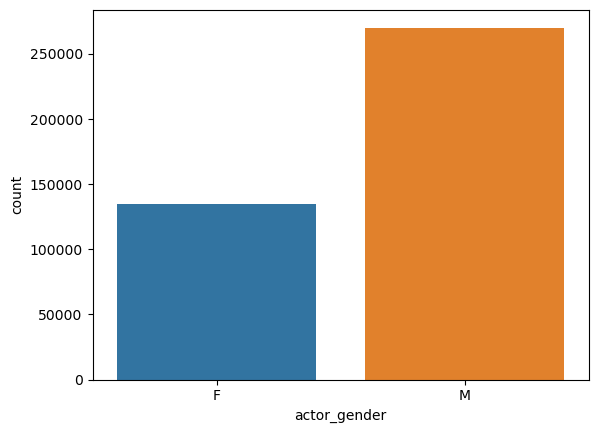

In [87]:
# Create two DataFrame for characters played by female/male
characters_female = characters_gender[characters_gender['actor_gender']== 'F']
characters_male = characters_gender[characters_gender['actor_gender']== 'M']

# Plot the repartition
sns.countplot(x = characters_gender['actor_gender'])
print("{:.2%} of reported characters are played by male actors.".format(len(characters_male)/len(characters_gender)))

### 3.3 - Comparison of age between male and female 

- We want to compare age of the actors and actresses palying roles reported in *characters*. 

In [93]:
# Clear out characters_gender where age is not reported (characters_gender_age)
characters_gender_age = characters_gender[characters_gender["actor_age_movie"].notnull()]
print('{: .1%} of the DataFrame "characters" has reported gender and age of the actor/actress; the corresponding \
    DataFrame "characters_gender_age" contains {} rows.'.format(len(characters_gender_age) / len(characters), len(characters_gender_age)))

 64.5% of the DataFrame "characters" has reported gender and age of the actor/actress; the corresponding     DataFrame "characters_gender_age" contains 290770 rows.


- We first explore and clean the data. 

In [94]:
# Explore basic statistics
characters_gender_age.describe()

,wiki_movie_ID,actor_height,actor_age_movie
count,2.907700e+05,139639.000000,290770.000000
mean,1.302929e+07,1.789524,37.804148
std,1.080402e+07,4.380801,20.616015
min,3.300000e+02,0.610000,-7896.000000
25%,3.052538e+06,1.680000,28.000000
50%,1.014264e+07,1.750000,36.000000
75%,2.261175e+07,1.830000,47.000000
max,3.750192e+07,510.000000,103.000000


- The negative values do not make sense: we filter them out.

In [95]:
# Keep only rows where "actor_age_movie" is positive
characters_gender_age = characters_gender_age[characters_gender_age['actor_age_movie'] >= 0]

- We plot age of actors in the movie in a boxplot. 

Text(0, 0.5, 'Age (years)')

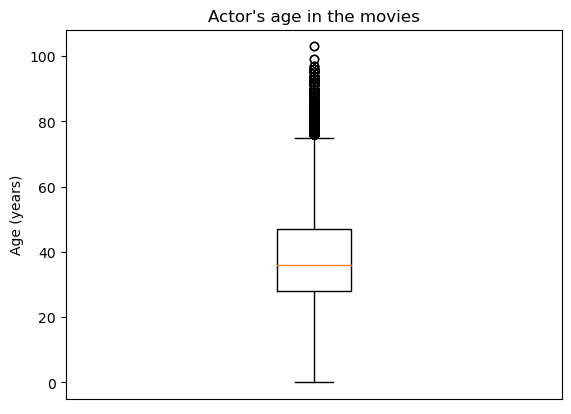

In [96]:
# Plot the distribution of age of actors
plt.boxplot(characters_gender_age['actor_age_movie'])
plt.xticks([])
plt.title("Actor's age in the movies")
plt.ylabel("Age (years)")

- We can visualize age of actors by gender. 

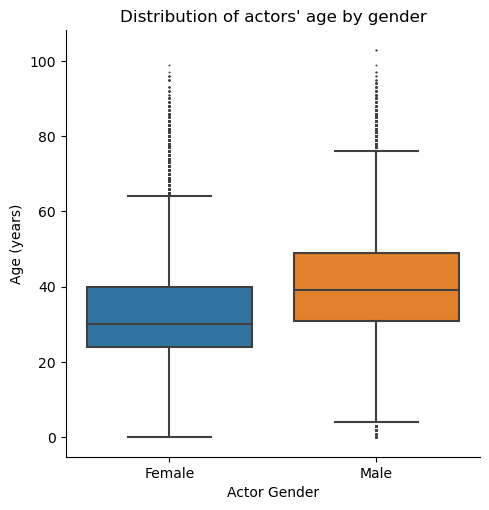

In [97]:
# Plot distribution of age by gender
g = sns.catplot(data=characters_gender_age, x="actor_gender", y="actor_age_movie", kind="box", fliersize=0.5)\
    .set(title="Distribution of actors' age by gender")
g.set_axis_labels("Actor Gender", "Age (years)")
g.set_xticklabels(["Female", "Male"])

### 3.4 - Comparison of height between gender

- We can perform the same analysis for height. 

In [98]:
# Clear out characters_gender where height is not reported (characters_gender_age)
characters_gender_height = characters_gender[characters_gender["actor_height"].notnull()]
print('{: .1%} of the DataFrame "characters" has reported gender and height of the actor/actress; \
    the corresponding DataFrame "characters_gender_height" contains {} rows.'.format(len(characters_gender_height) / len(characters), len(characters_gender_height)))

 34.3% of the DataFrame "characters" has reported gender and height of the actor/actress;     the corresponding DataFrame "characters_gender_height" contains 154663 rows.


In [99]:
# Explore basic statistics on height
characters_gender_height["actor_height"].describe()

count    154663.000000
mean          1.788966
std           4.382216
min           0.610000
25%           1.676400
50%           1.750000
75%           1.830000
max         510.000000
Name: actor_height, dtype: float64

- 510 cm seems to be a corrupted value. We filter rows where height is above 2,72m (biggest height reported).

In [100]:
# Keep only rows where "actor_height" is below 2.72m
characters_gender_height = characters_gender_height[characters_gender_height['actor_height'] < 2.73]

- Are there other outliers? 

Text(0, 0.5, 'Height (cm)')

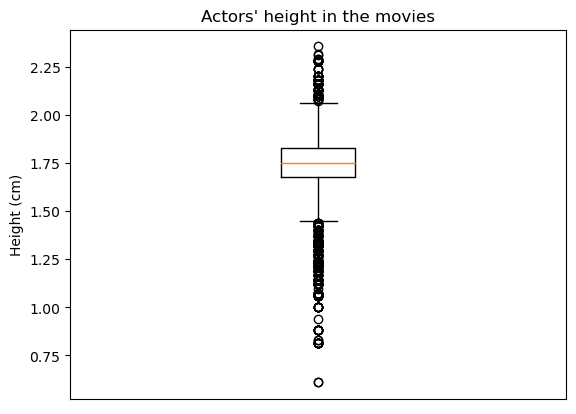

In [101]:
# Plot the distribution of height of actors
plt.boxplot(characters_gender_height['actor_height'])
plt.xticks([])
plt.title("Actors' height in the movies")
plt.ylabel("Height (cm)")

- We can visualize height by gender. 

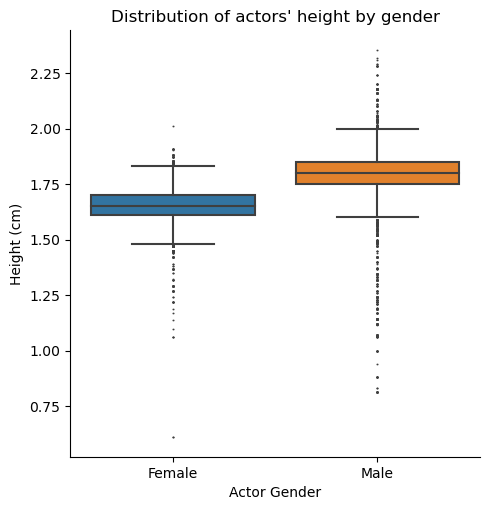

In [102]:
# Plot the distribution of height by gender
g = sns.catplot(data=characters_gender_height, x="actor_gender", y="actor_height", kind="box", fliersize=0.5).\
    set(title="Distribution of actors' height by gender")
g.set_axis_labels("Actor Gender", "Height (cm)")
g.set_xticklabels(["Female", "Male"])

- It seems that male characters have more outliers than female characters. Male characters are also **taller on average** than female characters. 

### 3.5 - Are the observed differences statistically significant? 

- We look at average age and height between male and female characters. 

In [103]:
# In the movies where characters are reported, actresses are on average smaller and younger than men 
characters_gender_grouped = characters_gender.groupby("actor_gender")[[ "actor_age_movie", "actor_height"]].mean()
characters_gender_grouped.head()

,actor_age_movie,actor_height
actor_gender,,
F,32.810753,1.659008
M,40.391679,1.863798


- Are these differences statistically significant? \
To answer this question, we perform an independent sample t-test under the null hypothesis: there is no difference between actors' and actresses'a age. 

In [104]:
# We first extract rows where character is played by a woman or by a man
characters_female_age = characters_gender_age[characters_gender_age['actor_gender']== 'F']
characters_male_age = characters_gender_age[characters_gender_age['actor_gender']== 'M']
print("{:.2%} of characters were gender and age are reported are male.".format(len(characters_male_age)/len(characters_gender_age)))
print("The DataFrame characters_female_age has {} rows, characters_male_age has {} rows.".format(len(characters_female_age), \
    len(characters_male_age)))

65.87% of characters were gender and age are reported are male.
The DataFrame characters_female_age has 99124 rows, characters_male_age has 191277 rows.


In [105]:
# characters_female and characters_male do not have the same shape, we extract 99 242 rows from characters_male to have 
# the same shape to perform an independent t-test
characters_male_age_corr = characters_male_age.sample(n=len(characters_female_age), replace=False)

# We perform the independent sample t-test to compare age of female and male actors
stat_indep_age, pvalue_indep_age = stats.ttest_ind(characters_female_age['actor_age_movie'], characters_male_age_corr['actor_age_movie'])
print("The p-value for the independent sample t-test is: {}".format(pvalue_indep_age))

The p-value for the independent sample t-test is: 0.0


- Here, the p-value is probably below a certain treshold and Pyhton returns 0. \
As the p-value verifies $ p < 0.05 $, actresses are significantly younger in movies of the dataset than actors, with 95% confidence. 

In [106]:
# We now do the same t-test to compare height of male and female actors
characters_female_height = characters_gender_height[characters_gender_height['actor_gender']== 'F']
characters_male_height = characters_gender_height[characters_gender_height['actor_gender']== 'M']
print("{:.2%} of characters were gender and age are reported are male.".format(len(characters_male_height)/len(characters_gender_height)))
print("The DataFrame characters_female has {} rows, characters_male has {} rows.".format(len(characters_female_height), len(characters_male_height)))

63.46% of characters were gender and age are reported are male.
The DataFrame characters_female has 56515 rows, characters_male has 98133 rows.


In [107]:
# characters_female and characters_male do not have the same shape, we extract 56 515 rows from characters_male to have the same shape to perform an independent t-test
characters_male_corr2 = characters_male_height.sample(n=len(characters_female_height), replace=False)

# We perform the independent sample t-test to compare age of female and male actors
stat_indep_height, pvalue_indep_height = stats.ttest_ind(characters_female_height['actor_height'], characters_male_corr2['actor_height'])
print("The p-value for the independent sample t-test is: {}".format(pvalue_indep_height))

The p-value for the independent sample t-test is: 0.0


- Here again the p-value verifies $ p < 0.05 $ so actresses are significantly smaller in movies of the dataset than actors, with 95% confidence. 

### 3.6 - Is there a correlation between age and gender, or between height and gender? 

---

## 4 - Geographic repartition of the movies

### 4.1 - Gather region for each country

- For this part, we use an online API which provides data about each country, and will use the name given in the dataset to gather the corresponding region.

- Since both datasets come from different sources, it is likely that the country names won't match, so we might need to do some changes.

In [ ]:
# Get region for each country

region_lst = ["Africa", "Americas", "Asia", "Europe", "Oceania"]
countries = {"country" : [],
"region" : []}

country_lst = [[], []]
df_countries = pd.DataFrame(columns = ["country", "region"])

for region in region_lst:
    response = requests.get("https://restcountries.com/v3.1/region/" + region).json()

    for elem in response:
        countries["country"].append(elem.get("name").get("common"))
        countries["region"].append(region)

df_countries = pd.DataFrame.from_dict(countries)
df_countries.head()

### 4.2 - Missing countries in the country-region table

We now want to answer the following questions: 
- What are the unreferenced countries?
- For each of these countries, how many movies did they produce/co-produce?
- Which countries represent 95% of all thoses movies? 

We could then **keep only these countries**, and update the country-region reference table. 

In [ ]:
all_movie_countries = movies.explode("movie_countries", ignore_index = True)
unique_movie_countries = all_movie_countries.loc[all_movie_countries["movie_countries"].isnull()]
grunique_movie_countries = unique_movie_countries.groupby("movie_name").size()
grunique_movie_countries = grunique_movie_countries.groupby(grunique_movie_countries).size()
ax = grunique_movie_countries.plot.bar()
ax.set_yscale("log")
ax.set_xlabel("# NaN reference in movie_countries") 
ax.set_ylabel("# movies")
ax.set_title("Amount of movies by amount of NaN country occurence in movie_countries");
print(f"There is a total of {grunique_movie_countries.sum()} movies that contain a null movie name (NaN) among the producing countries (movie_countries column)")
print(f"{grunique_movie_countries.iloc[0]/grunique_movie_countries.sum() :.2%} of them only contain 1 NaN occurence, up to {grunique_movie_countries.max()}.")
grunique_movie_countries

In [ ]:
######################################
# What are the unreferenced countries?
######################################

# Get all unique countries in our dataset
all_movie_countries = movies["movie_countries"].explode(ignore_index = True)
unique_movie_countries = all_movie_countries.unique()

# Referenced unique countries
referenced_countries = df_countries["country"].unique()

# Unreferenced countries in the dataset
unreferenced = [a for a in unique_movie_countries if a not in referenced_countries]

###########################################################################
# For each of these countries, how many movies did they produce/co-produce?
###########################################################################

df_unreferenced = all_movie_countries.groupby(all_movie_countries).size()
df_unreferenced = df_unreferenced[df_unreferenced.index.isin(unreferenced)].sort_values(ascending = False)

# Plot
ax = df_unreferenced.plot.bar()
ax.set_yscale("log")
ax.set_xlabel("country") 
ax.set_ylabel("# movies")
ax.set_title("Amount of movies released by unknow countries from the API response");

# Get country names representing 95% of movie quantity
percentile_95 = df_unreferenced.sum() * 0.95
countries_to_keep = df_unreferenced[df_unreferenced.cumsum() <= percentile_95]

print(f"95% of these movies come from {countries_to_keep.index.values}")

# Add these countries to the API dataframe response
countries_to_add = dict(zip(["country", "region"], [countries_to_keep.index.values.tolist(), ["Americas", "Europe"]]))
countries_to_add = pd.DataFrame.from_dict(countries_to_add)
df_countries = pd.concat([df_countries, countries_to_add], ignore_index=True)


# Update the list of unreferenced countries
for country in countries_to_keep.index.values.tolist():
    unreferenced.pop(unreferenced.index(country))

### 4.3 - Clean dataset

- We now remove all movies with a "movie_country" item in one of the unreferenced country we do not want to consider.

In [ ]:
movie_count = len(movies)
movies = movies[movies.movie_countries.apply(lambda x: not any(i in unreferenced for i in x))]
print(f"{movie_count - len(movies)} movies were removed.")

### 4.4 - Add the region information to our dataset

- The *region* column contains the continent in which the movie was produced (can be different regions if multiple countries from different continent co-produced the movie).

In [82]:
# Add region column
# For each country in movies.movie_countries, get the region (remove region duplicates)
def get_region(country_lst):
    output = []
    for country in country_lst:
        try:
            output.append(df_countries.loc[df_countries["country"] == country]["region"].values[0])
        except:
            raise KeyError(f"{country} not found in the reference list")

    #remove duplicates
    return list(set(output))

movies_copy = movies.copy()
movies_copy["region"] = movies_copy.loc[:, ("movie_countries")].apply(lambda x: get_region(x))
movies = movies_copy.copy()
movies.head()

,wiki_movie_ID,freebase_movie_ID,movie_name,movie_release_date,movie_box_off_rev,movie_runtime,movie_languages,movie_countries,movie_genres,movie_countries_id,movie_genres_id,movie_languages_id,region
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,[English Language],[United States of America],"[Thriller, Science Fiction, Horror, Adventure,...",[/m/09c7w0],"[/m/01jfsb, /m/06n90, /m/03npn, /m/03k9fj, /m/...",[/m/02h40lc],[Americas]
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,[English Language],[United States of America],"[Mystery, Biographical film, Drama, Crime Drama]",[/m/09c7w0],"[/m/02n4kr, /m/03bxz7, /m/07s9rl0, /m/0hj3n01]",[/m/02h40lc],[Americas]
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,[Norwegian Language],[Norway],"[Crime Fiction, Drama]",[/m/05b4w],"[/m/0lsxr, /m/07s9rl0]",[/m/05f_3],[Europe]
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,[English Language],[United Kingdom],"[Thriller, Erotic thriller, Psychological thri...",[/m/07ssc],"[/m/01jfsb, /m/0glj9q, /m/09blyk]",[/m/02h40lc],[Europe]
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,[German Language],[Germany],[Drama],[/m/0345h],[/m/07s9rl0],[/m/04306rv],[Europe]


### 2.5 - Movie repartition by region

- Which regions, or continents, are the most represented in the dataset? 

Text(0.5, 1.0, 'Amount of movies produced by each region')

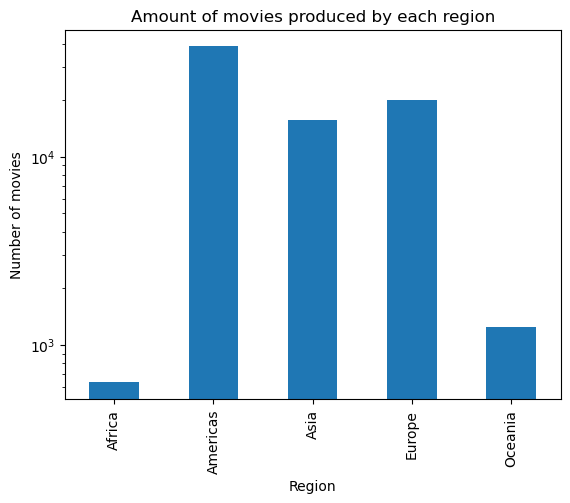

In [83]:
# Plot the distribution of the number of movies by region
movies_region = movies["region"].explode()
movies_region = movies_region.groupby(movies_region).size()
ax = movies_region.plot.bar()
ax.set_yscale("log")
ax.set_xlabel("Region") 
ax.set_ylabel("Number of movies")
ax.set_title("Amount of movies produced by each region")

- As expected, **America** is the **biggest producer** of movie in our dataset, followed by Europe and Asia. The number of movies is much lower in Africa and Oceania. 

## 5 - Which genre are included in the dataset? 

In this part, we analyze the feature "movie_genres" to understand how we can include it as a parameter to answer our main question. 

### 5.1 - Transform and clean the dataset

- We notice some corrupted values and correct them. 

In [ ]:
# Warning, some rows of the dataset have wrong release dates: here 1010 instead of 2010
movies.iloc[62836]

In [ ]:
# Replace the wrong value of 1010
movies.loc[62836, 'movie_release_date'] = '2010-12-02'

In [ ]:
# Keep only the year of the release date
movies['movie_release_date'] = movies['movie_release_date'].str[:4]

### 5.2 - How many genre a movie has? 

- We first want to know how many genre a movie has to better understand how this characterizes the movie.

In [ ]:
# Compute the number of reported genre by movie
movies['nb_genres'] = movies['movie_genres'].str.len()
movies.head()

- We can look at basic statistics on "nb_genres" and plot the distribution. 

In [ ]:
movies['nb_genres'].describe()

In [ ]:
# Plot the distribution of "nb_genres"
movies.boxplot(['nb_genres'])

- According to the previous analyzes, most of the movies have between 1 and 4 genre. Therefore, the genre is a good descriptor of a movie. However, movies can have up to 17 genre, in which case the genre gives less information, which has to be kept in mind for further analyses. 

### 5.3 - What are the genre the most represented in the dataset? 

- We now look at the opposite point of view: **how many movies are reported for each genre?** 

In [ ]:
# Explode the list in individual genre and count how many movies are reported for each genre
total_genres = pd.DataFrame(movies.movie_genres.explode().dropna().value_counts())
total_genres.head()

In [ ]:
# Plot the number of movies reported for each genre
total_genres.index.name = "Genres"
total_genres = total_genres.rename(columns = {'movie_genres': 'Total'})
total_genres.head(30).plot.bar(y = 'Total', title = "Number of movies by genre")

- Here we see that the number of movies by genre decreases almost exponentially. Among the genre in the tail, we find cross genre like "Romantic Thriller" or error of typology like "Comdedy". There are also some categories which are not stricly genre like "silent movie" or "black and white". Keeping them in our analysis does not seem pertinent as they do not reflect a trend intrinsic to a genre.

- For future analyses on genre, we chose to retain only the **5 genre the most represented in the dataset**, excluding the "Black and White" category, which we not consider as a genre: 
    - Drama
    - Comedy 
    - Romance film 
    - Action
    - Thriller

- This choice is supported by the fact that they correspond to natural responses one would answer when asked about most represented genre.

### 5.4 - Evolution over time

- Has the evolution of most represented genre changed over time?  

In [ ]:
# Group by "movie_release_date"
movies_per_year_grouped = movies.groupby(movies['movie_release_date'])

# Compute the number of movies by year and by genre
total_genres_per_year = total_genres
years = ['Total']
for year, group in movies_per_year_grouped[['movie_release_date', 'movie_genres']]:
    total_genres_per_year = pd.concat([total_genres_per_year, group.movie_genres.explode().dropna().value_counts()], axis = 1)
    years.append(year)
total_genres_per_year.columns = years
total_genres_per_year.index.name = 'Genres'
total_genres_per_year.head()

In [ ]:
# Plot the evolution of the number of movies by genre for the top 10
x = np.array(total_genres_per_year.columns[1:], dtype = 'datetime64[ms]')
plt.figure()
for index, row in total_genres_per_year.head(10).iterrows():
    plt.plot(x, row[1:], label = index)
plt.legend()
plt.xlabel("Date of release")
plt.ylabel("Number of movies")
plt.title("Evolution of the number of movies for each genre over time")
plt.show()

- By looking at the number of genre per year, we see a **similar evolution for every genre.** For every genre the number of movies highly increases over time,  except for "black and white" movies. The striking drop around 2010 probably corresponds to time of extraction of the database (2012).

- We can look at the counts. 

In [ ]:
movies_per_year_grouped[['movie_release_date']].size().reset_index(name='counts').sort_values(by = 'movie_release_date', ascending= False).head(10)

- As we can see here, values are incoherent after 2013. Therefore, we will **cut off after 2012 (included)**, which is coherent with the date of extraction of the database. 

- According to the following graph made with IMDB dataset, the behavior of the number of movie by year is similar, which supports the hypothesis that the dataset provides evolution close to reality.
![films-released-yearly](films-released-all-time-yearly.png)

___

Is gender correlated with age of actors in the movies ? 

In [ ]:
# Transform categorical value "actor_gender" into a numerical one
characters_gender_age_num = pd.get_dummies(data = characters_gender_age[['actor_gender', 'actor_age_movie']])

# We perform a Pearson correlation between gender and age of actors
stats.pearsonr(characters_gender_age_num['actor_gender_F'], characters_gender_age_num['actor_age_movie'])

- There is a small (-0.26) but significant ($ p < 0.05 $) negative correlation. 

In [ ]:
# We can also examine Spearman rank correlation
stats.spearmanr(characters_gender_age_num['actor_gender_F'], characters_gender_age_num['actor_age_movie'])

- Spearman rank correlation is also significant. 

- These analyses on age and height could be useful in further analyses to understand how characters played by men and women differ and what lead to these differences. 

### 5.1 - Percentage of women in movies

- First, we want to compute the percentage of women in each movie where there is a reported character with a gender. 

In [ ]:
# creation of a column with "True" for womens
characters_gender['female'] = characters_gender['actor_gender']=='F'

# compute percentage of women by movie
percentage_female = characters_gender.groupby(characters_gender['freebase_movie_ID'])[['freebase_movie_ID','female']].mean()
percentage_female.head()


We create a new DataFrame where we merge *movies* with *percentage_female* to add the percentage of female for each movie. 

In [ ]:
movies_female = movies.merge(percentage_female, left_on='freebase_movie_ID', right_on='freebase_movie_ID')
movies_female.head()

- How many movies did we lose by merging? 

In [ ]:
print("We kept {:.2%} of the DataFrame movies by merging.".format(len(movies_female)/len(movies)))

### 5.2 - Temporal evolution of female percentage in movies

We now want to examine how female percentage in movies evolved over time. 

In [ ]:
movies_female_gp_year = movies_female.groupby(movies_female['movie_release_date'])[['female']].mean()
movies_female_gp_year.head()

- We want to plot the percentage of women over time.

In [ ]:
movies_female_gp_year.plot(legend=False)
plt.ylabel('Mean ratio of female by movie')
plt.xlabel('year')
plt.title('Presence of women in movies over time')
plt.axhline(y=0.5,color ='red', ls='--')

## 6 - How to evaluate the success of a movie ? 

In our dataset, the only feature we have to measure the success of a movie is the **box office revenue**. We will first analyze this feature in our dataset. 

### 6.1 - Cleaning and missing values

In [ ]:
# How many movies have a missing box office revenue value? 
print("{:.2%} of the movies have a missing movie box office revenue value.".format(movies.isnull().sum()['movie_box_off_rev']/len(movies)))

- How are the missing values distributed over time ? 
- We calculate the number of movies per year which have a reported box office revenue. 

In [ ]:
# Keep only movies with a value for box office revenue
movies_with_bor = movies[movies.movie_box_off_rev.isnull()==False]

# Group by year and count the number of movies
movies_with_bor_gp_year = movies_with_bor.groupby(movies_with_bor['movie_release_date'])[['movie_release_date']].count()
movies_with_bor_gp_year.head()

- To plot evolution of movies without missing values over time, we normalize on the total number of movies, as we saw in 2 that it strongly increased over time. 

In [ ]:
# Compute number of movies with missing values over total number of movies per year
movie_count_all_gp_year = movies.groupby(movies['movie_release_date'])[['movie_release_date']].count()
movie_count_all_gp_year['ratio_bor']=movies_with_bor_gp_year['movie_release_date']/movie_count_all_gp_year['movie_release_date']

In [ ]:
#Plot the distribution
movie_count_all_gp_year['ratio_bor'].plot(legend=False)
plt.ylabel('ratio of values for the feature "movie_box_off_rev"')
plt.xlabel('year')
plt.title('Ratio of values available per year for the feature "movie_box_off_rev"')

- We can see that the **ratio of movies with a value for box office revenue increases with time**; however, the ratio never exceeds 20% of the dataset, which is quite low. 

### 6.2 - Evolution of average box office revenue over time

- We now want to analyze the evolution of the box office revenue over time. 

In [ ]:
# Compute the average box office revenue by year
movies_mean_bor_gp_year = movies_with_bor.groupby(movies_with_bor['movie_release_date'])[['movie_box_off_rev']].mean()
movies_mean_bor_gp_year.head()

In [ ]:
# Plot the distribution
movies_mean_bor_gp_year.plot(legend=False)
plt.ylabel('Average box office revenue (USD)')
plt.xlabel('year')
plt.title('Evolution of the average box office revenue')

* To be perfectly accurate in comparing box office receipt comparison over time, we should adjust revenues for dollar inflation. One could go further and consider even more adjustements to be even more precise as explained in [this article](https://wwwold.usi.edu/media/3655032/How-the-MPA-Miscalculates.pdf).

- Even if these results are interesting, the amount of missing values is quite problematic. To evaluate the success of a movie, we can also look at the ratings of the movies. The data is not available in our dataset but we can use IMDb.

### 6.3 - Get the IMDb dataset

In [ ]:
# Import dataset title.basics and title.ratings
imdb_data_df = pd.read_csv('Data/Imdb/title.basics.tsv', sep = '\t')
imdb_ratings_df = pd.read_csv('Data/Imdb/title.ratings.tsv', sep = '\t')

imdb_data_df.head(10)

In [ ]:
imdb_ratings_df.head(10)

In [ ]:
# Merge imdb_data_df and imdb_ratings_df on ratings
rating_df = imdb_data_df.merge(imdb_ratings_df)

In [ ]:
# Delete unnessary columns  
rating_df = rating_df.drop(['isAdult', 'endYear'], axis = 1)

In [ ]:
rating_df.iloc[423117]

In [ ]:
#Replace \N by NaN, replace corrupted values, drop missing values and convert run time into numerical data
rating_df[['runtimeMinutes', 'startYear']] = rating_df[['runtimeMinutes', 'startYear']].replace(r"\N", np.NaN).replace("Game-Show", np.NaN).replace("Game-Show,Reality-TV", np.NaN).dropna(subset = ['runtimeMinutes', 'startYear'])
rating_df = rating_df.dropna(subset = 'runtimeMinutes')
rating_df['runtimeMinutes'] = pd.to_numeric(rating_df['runtimeMinutes'])

In [ ]:
# Merge movies with ratings_df on primary title and start year
merged_rating_df = movies.merge(rating_df, left_on = ['movie_name', 'movie_release_date'], right_on = ['primaryTitle', 'startYear'])
merged_rating_df.head()

- There are some duplicates because of the merge, we have to treat them. 

In [ ]:
# Remove duplicates
merged_rating_df[merged_rating_df.duplicated(subset = ['freebase_movie_ID'], keep=False)]

- We can finally export the final dataset by keeping only columns of interest

In [ ]:
# Keep only column of interest and export the final dataset
merged_rating_df = merged_rating_df.drop_duplicates(subset = 'freebase_movie_ID', keep = 'first')
merged_rating_df[['freebase_movie_ID', 'tconst', 'titleType', 'primaryTitle', 'originalTitle', 'startYear', 'runtimeMinutes', 'genres','averageRating', 'numVotes']].to_csv('Data/Imdb/processed_imdb_dataset.csv')

### 6.4 - Rating of movies

In [ ]:
imdb = pd.read_csv('Data/Imdb/processed_imdb_dataset.csv')
imdb.head()

- We can start by computing the average rating by year

In [ ]:
#Group rating by year and compute mean rating 
imdb_rating_gp_year = imdb.groupby(imdb['startYear'])[['averageRating']].mean()
imdb_rating_gp_year.head()

In [ ]:
#Plot the distribution
imdb_rating_gp_year.plot(legend=False)
plt.ylabel('Average movie rating (/10)')
plt.xlabel('year')
plt.title('Evolution of movie ratings')

In [ ]:
# Merge imdb et movie metadata
imdb.sort_values(by = 'startYear', ascending = False).head()

### 6.5 - Correlation between rating and box office revenue

- Now we have two measures of a movie's success and we wonder wether these two features are correlated. As we saw in the previous parts, there are many missing values on box office revenues. If these two features are strongly correlated, we could keep only rating as a measure of success and have a larger dataset to work on. 

In [ ]:
# Merge movies with box office revenue and dataset with ratings on freebase_movie_ID
correl = movies_with_bor.merge(imdb, left_on='freebase_movie_ID', right_on='freebase_movie_ID')
correl.head()

In [ ]:
#Compute Pearson correlation coefficient
stats.pearsonr(correl['movie_box_off_rev'],correl['numVotes'])

- The Pearson linear coefficient is low but significantly positive ($ p < 0.05$). The correlation seems too low to keep only one feature as a measure of success. Therefore we could **keep both** for further analyses and draw different conclusions from their exploitation. 